# Case Study 0 3
# Artificial Neural Network

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple, Samsung etc.
He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market, you cannot simply assume things. 
To solve this problem, he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone (eg:- RAM, Internal Memory etc) and its selling price. But he is not so good at Machine Learning. 

Create an artificial neural network-based classifier to help Bob.
Data and class labels are available in mobile_price_classification.csv file. Use **price_range column as label** and remaining columns as data.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np

### Data loading

In [2]:
df = pd.read_csv('mobile_price_classification.csv')
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [4]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

**Inference:**

* There are 20 features an one label column.
* All of them are of int64 or float64 data types.
* Dataset having 2000 observations.
* Label column is having 4 classes so that this is a multicalass classfication problem.

### Data preprocessing 

In [5]:
# Min-Max Scaling 

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df['battery_power'] = sc.fit_transform(df[['battery_power']])
df['clock_speed'] = sc.fit_transform(df[['clock_speed']])
df['int_memory'] = sc.fit_transform(df[['int_memory']])
df['mobile_wt'] = sc.fit_transform(df[['mobile_wt']])
df['px_height'] = sc.fit_transform(df[['px_height']])
df['px_width'] = sc.fit_transform(df[['px_width']])
df['ram'] = sc.fit_transform(df[['ram']])

In [6]:
#Splitting dataset into label and data.

data = df.drop('price_range',axis=1)
label = df.price_range

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.25, random_state=42)

In [8]:
X_train.shape

(1500, 20)

### ANN Model Building

In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
47/47 [==============================] - 1s 3ms/step - loss: 4.4679 - accuracy: 0.2420
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 2.6701 - accuracy: 0.2353
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 1.9278 - accuracy: 0.2293
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 1.6680 - accuracy: 0.2407
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 1.5753 - accuracy: 0.2440
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 1.5255 - accuracy: 0.2520
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 1.4934 - accuracy: 0.2500
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 1.4699 - accuracy: 0.2600
Epoch 9/100
47/47 [==============================] - 0s 3ms/step - loss: 1.4523 - accuracy: 0.2593
Epoch 10/100
47/47 [==============================] - 0s 3ms/step - loss: 1.4412 - accuracy: 0.2560
Epoch 11/

**Inferences:**

* Got an accuracy of 0.83

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


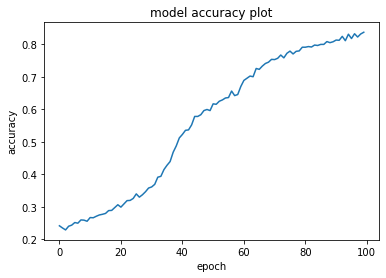

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# plotting accuracy plot

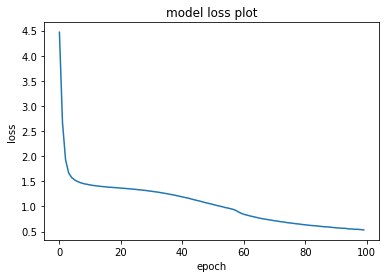

In [15]:
plt.plot(history.history['loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#plotting loss plot

##### Jibin K Joy, ML & AI, KKEM August 2022 Batch